# Time Series

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Files

In [13]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")
full_df = full_df[full_df["Date"] == pd.Timestamp(2019,3,25)].reset_index().drop(columns=["index"])
full_df.sort_values(by=["Date", "Hour"], inplace=True)

pred_reg_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfg_Predictions.csv")
pred_reg_df["Date"] = pd.to_datetime(pred_reg_df["Date"], format="%Y-%m-%d")
pred_reg_df["Hour"].replace(2400, 0, inplace=True)
pred_reg_df.sort_values(by=["Date", "Hour"], inplace=True)

In [14]:
pred_clas_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfc_Predictions.csv")
pred_clas_df["Date"] = pd.to_datetime(pred_clas_df["Date"], format="%Y-%m-%d")
pred_clas_df["Hour"].replace(2400, 0, inplace=True)
pred_clas_df.sort_values(by=["Date", "Hour"], inplace=True)

In [15]:
pred_reg_df.head()

,Date,Hour,Sensor,SensorLongitude,SensorLatitude,CrowdednessCount
23,2019-03-25,0,GAWW-03,4.897334,52.372524,1294.178462
47,2019-03-25,0,GAWW-07,4.900441,52.374414,1427.787692
71,2019-03-25,0,GAWW-01,4.899847,52.374601,1471.950769
95,2019-03-25,0,GAWW-02,4.898903,52.373786,1481.858462
119,2019-03-25,0,GAWW-04,4.897908,52.373283,1301.544615


In [16]:
full_df.head()

,Date,Hour,Nieuwmarkt Lat,Nieuwmarkt Lon,Nieuwezijds Kolk Lat,Nieuwezijds Kolk Lon,Dam Lat,Dam Lon,Spui Lat,Spui Lon,...,Nieuwmarkt score,Nieuwmarkt weight,Nieuwezijds Kolk score,Nieuwezijds Kolk weight,Dam score,Dam weight,Spui score,Spui weight,Centraal Station score,Centraal Station weight
111,2019-03-25,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.049962,0.0,0.253382,-0.0,-1.207589,-0.0,-2.350505,0.0,1.043862
112,2019-03-25,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.053756,0.0,0.438122,-0.0,-0.715745,-0.0,-1.651703,0.0,0.838977
113,2019-03-25,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.882141,0.0,0.587521,-0.0,-0.070905,-0.0,-0.681885,0.0,0.346680
114,2019-03-25,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.950804,0.0,0.604705,-0.0,-0.282932,-0.0,-1.073950,0.0,0.616915
115,2019-03-25,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.958977,0.0,0.480009,-0.0,-0.222258,-0.0,-0.814280,0.0,0.366371


## Plots

In [22]:
x_1 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-01"]["CrowdednessCount"].values.reshape(-1,1)
x_2 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-02"]["CrowdednessCount"].values.reshape(-1,1)
x_3 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
x_4 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-04"]["CrowdednessCount"].values.reshape(-1,1)
x_5 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-05"]["CrowdednessCount"].values.reshape(-1,1)
x_6 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-06"]["CrowdednessCount"].values.reshape(-1,1)
x_7 = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-07"]["CrowdednessCount"].values.reshape(-1,1)
date = pred_reg_df[pred_reg_df["Sensor"] == "GAWW-03"]["Hour"] 
date = date.values.reshape(-1,1)

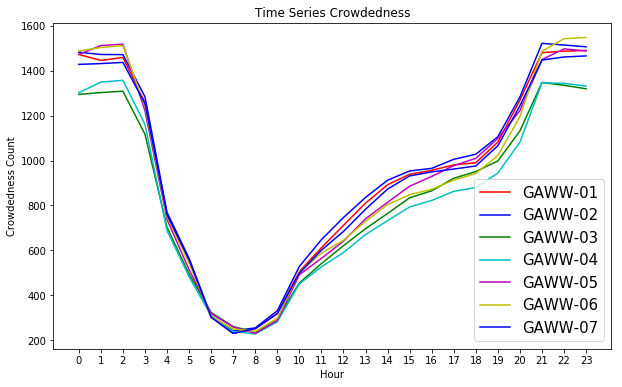

In [23]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="GAWW-01")
plt.plot(date,x_2, "b", label="GAWW-02")
plt.plot(date,x_3, "g", label="GAWW-03")
plt.plot(date,x_4, "c", label="GAWW-04")
plt.plot(date,x_5, "m", label="GAWW-05")
plt.plot(date,x_6, "y", label="GAWW-06")
plt.plot(date,x_7, "b", label="GAWW-07")


plt.legend(prop={"size": 15})
plt.xticks(range(0,2400,100), ("0","1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
                          "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"))
plt.yticks(range(200, 1800, 200))
plt.xlabel("Hour")
plt.ylabel("Crowdedness Count")
plt.title("Time Series Crowdedness")
plt.savefig('../../../Data_thesis/Useful/reg_timeSeries.png')

In [24]:
x_1 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-01"]["CrowdednessCount"].values.reshape(-1,1)
x_2 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-02"]["CrowdednessCount"].values.reshape(-1,1)
x_3 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-03"]["CrowdednessCount"].values.reshape(-1,1)
x_4 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-04"]["CrowdednessCount"].values.reshape(-1,1)
x_5 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-05"]["CrowdednessCount"].values.reshape(-1,1)
x_6 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-06"]["CrowdednessCount"].values.reshape(-1,1)
x_7 = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-07"]["CrowdednessCount"].values.reshape(-1,1)
date = pred_clas_df[pred_clas_df["Sensor"] == "GAWW-03"]["Hour"]
date = date.values.reshape(-1,1)

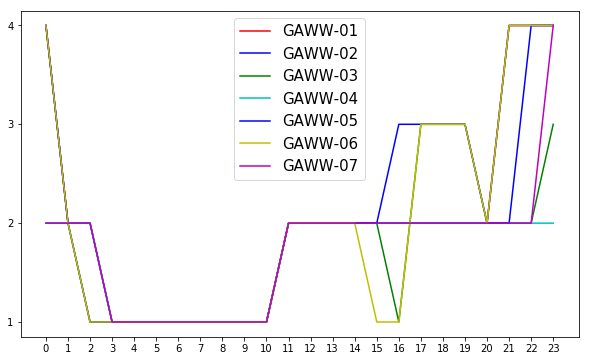

In [26]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="GAWW-01")
plt.plot(date,x_2, "b", label="GAWW-02")
plt.plot(date,x_3, "g", label="GAWW-03")
plt.plot(date,x_4, "c", label="GAWW-04")
plt.plot(date,x_5, "b", label="GAWW-05")
plt.plot(date,x_6, "y", label="GAWW-06")
plt.plot(date,x_7, "m", label="GAWW-07")


plt.legend(prop={"size": 15})
plt.yticks(range(1,5,1), ("1", "2", "3", "4"))
plt.xticks(range(0,2400,100), ("0","1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
                          "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"))
plt.savefig('../../../Data_thesis/Useful/clas_timeSeries.png')